In [1]:
#importing  necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow_text as text
import tensorflow_hub as hub


In [2]:
#loading traning data
train_csv_loc = "/kaggle/input/llm-detect-ai-generated-text/train_essays.csv"
train_csv = pd.read_csv(train_csv_loc)
train_csv

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [3]:
#loading promps data
prompts_csv = "/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv"
pd.read_csv(prompts_csv)

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


generated
0    1375
1       3
Name: text, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb3e05ed150>,
 [Text(-1.0999742722741532, 0.0075233194101512945, 'generated by students'),
  Text(1.099974272477764, -0.007523289640464896, 'generated by LLM')],
 [Text(-0.5999859666949926, 0.004103628769173433, '99.78%'),
  Text(0.599985966806053, -0.00410361253116267, '0.22%')])

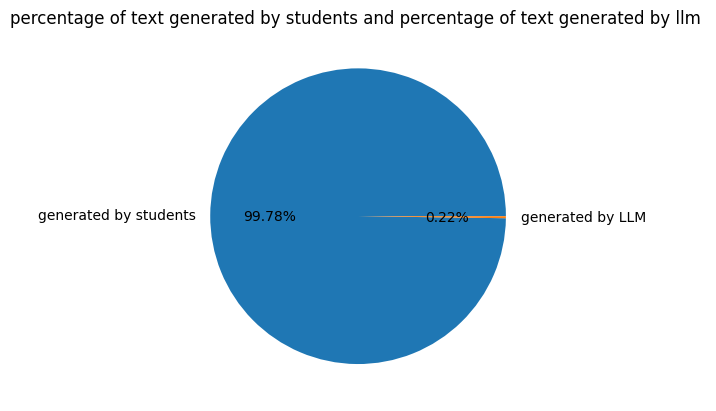

In [6]:
#EDA on test data
percentage=train_csv.groupby('generated').count()['text']
print(percentage)
plt.title("percentage of text generated by students and percentage of text generated by llm ")
plt.pie(percentage,labels=['generated by students','generated by LLM'],autopct = '%0.2f%%')



by the above results the given data is **highly imbalanced** and we need to make this a balanced data set

prompt_id
0    708
1    670
Name: generated, dtype: int64


([<matplotlib.patches.Wedge at 0x7fb3e19f1d20>,
 [Text(-0.04763336781987195, 1.0989681807359741, 'Car-free cities'),
  Text(0.047633367819872305, -1.0989681807359741, 'Does the electoral college work?')],
 [Text(-0.025981836992657426, 0.5994371894923495, '51.38%'),
  Text(0.025981836992657617, -0.5994371894923495, '48.62%')])

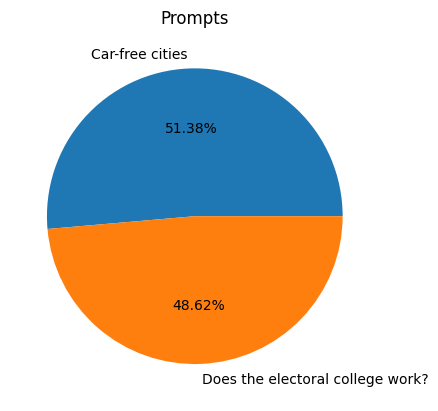

In [9]:
prompt_percentage=train_csv.groupby('prompt_id').count()['generated']
print(prompt_percentage)
plt.title("Prompts")
plt.pie(prompt_percentage,labels=["Car-free cities","Does the electoral college work??"],autopct="%0.2f%%")

for prevention of data imbalance we add data from various sources

*about the data we are going to add which is availabe in kaggle
*


This dataset (specifically the file Mistral7B_CME_v7.csv) consists of 4900 LLM generated texts.

Update: The new file Mistral7B_CME_v7_15_percent_corruption.csv has also been added as per the discussion "Alternative approach - Simulating hidden dataset".

v1: 700 LLM texts for prompt 6 "Exploring Venus" for use in the LLM - Detect AI Generated Text competition.

v2: + 700 LLM texts for prompt 8 "The Face on Mars"

v3: + 700 LLM texts for prompt 4 "A Cowboy Who Rode the Waves"

v4: + 700 LLM texts for prompt 11 "Driverless cars"

v5: + 700 LLM texts for prompt 7 "Facial action coding system"

v6: + 700 LLM texts for prompt 2 "Car-free cities"

v7: + 700 LLM texts for prompt 12 "Does the electoral college work?"

In [13]:
dataset_1_loc ='/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v6.csv'
add_data1 = pd.read_csv(dataset_1_loc)
add_data1 = aug_data1[aug_data1["prompt_id"]==2]
add_data1["prompt_id"]=aug_data1['prompt_id']-2
add_data1

,prompt_id,text,prompt_name,generated
3500,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3501,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3502,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3503,0,Car-free cities have become increasingly popu...,Car-free cities,1
3504,0,Car-free cities are a growing concept in toda...,Car-free cities,1
...,...,...,...,...
4195,0,The concept of car-free cities is becoming in...,Car-free cities,1
4196,0,Car-free cities: a vision for a healthier and...,Car-free cities,1
4197,0,The concept of car-free cities has gained pop...,Car-free cities,1
4198,0,Car-free cities are cities where cars are not...,Car-free cities,1


In [14]:
dataset_2_loc = '/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v7.csv'
add_data2 = pd.read_csv(dataset_2_loc)
add_data2 = aug_data2[aug_data2["prompt_id"]==12]
add_data2["prompt_id"]=aug_data2['prompt_id']-11
add_data2

,prompt_id,text,prompt_name,generated
4200,1,The electoral college is a system that is use...,Does the electoral college work?,1
4201,1,The electoral college system that is used to ...,Does the electoral college work?,1
4202,1,The electoral college is a system used in the...,Does the electoral college work?,1
4203,1,The electoral college is a system in which ci...,Does the electoral college work?,1
4204,1,The Electoral College is a system used in the...,Does the electoral college work?,1
...,...,...,...,...
4895,1,The electoral college is one of the most disc...,Does the electoral college work?,1
4896,1,"Dear Sen. [Name],\n\nI am writing to express ...",Does the electoral college work?,1
4897,1,The electoral college is a system that is use...,Does the electoral college work?,1
4898,1,A strong electoral system is vital to the fun...,Does the electoral college work?,1


In [21]:
#*concating the data exported*
add_data_mistral = pd.concat([aug_data1,aug_data2],axis=0)
add_data_mistral

,prompt_id,text,prompt_name,generated
3500,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3501,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3502,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3503,0,Car-free cities have become increasingly popu...,Car-free cities,1
3504,0,Car-free cities are a growing concept in toda...,Car-free cities,1
...,...,...,...,...
4895,1,The electoral college is one of the most disc...,Does the electoral college work?,1
4896,1,"Dear Sen. [Name],\n\nI am writing to express ...",Does the electoral college work?,1
4897,1,The electoral college is a system that is use...,Does the electoral college work?,1
4898,1,A strong electoral system is vital to the fun...,Does the electoral college work?,1


In [22]:
#exporting more the data google palm
google_palm = pd.read_csv('/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv').drop(columns=['id'])
google_palm = google_palm.drop(columns=['prompt_id'])
google_palm

,text,generated
0,## The Advantages of Limiting Car Usage\n\nIn ...,1.0
1,"The United States is a car-dependent nation, w...",1.0
2,"In recent years, there has been a growing move...",1.0
3,"In recent years, there has been a growing move...",1.0
4,"In the past few decades, the United States has...",1.0
...,...,...
1379,"Dear Senator,\n\nI am writing to you today to ...",1.0
1380,"Dear Senator,\n\nI am writing to you today to ...",1.0
1381,"Dear Senator,\n\nI am writing to you today to ...",1.0
1382,"Dear Senator,\n\nI am writing to you today to ...",1.0


In [23]:
big_set =pd.read_csv('/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_train.csv')
big_set_0_4000 = big_set[big_set['label']==0].iloc[0:4000,:] #first 2000 rows of human written texts
big_set_1_2600 = big_set[big_set['label']==1].iloc[0:2600,:] #first 600 rows of AI written texts
big_set_0_4000

,text,label
0,We should keep the Electoral College for a num...,0
2,Limiting car usage can actually be effective b...,0
4,"Dear Principal,\n\nAfter school or during scho...",0
5,"Many people think that aliens are real, but th...",0
8,I think if a student has a C average he or she...,0
...,...,...
6358,""" All of our development since World War 2 has...",0
6362,Some people do extracurricular activities and ...,0
6363,Exploring Venus would be a pretty amazing expe...,0
6366,You should participate in the Seagoing cowboys...,0


In [24]:
big_set_6600 = pd.concat([big_set_0_4000,big_set_1_2600],axis=0)
big_set_6600.rename(columns={'label':'generated'},inplace=True)
big_set_6600

,text,generated
0,We should keep the Electoral College for a num...,0
2,Limiting car usage can actually be effective b...,0
4,"Dear Principal,\n\nAfter school or during scho...",0
5,"Many people think that aliens are real, but th...",0
8,I think if a student has a C average he or she...,0
...,...,...
7005,The debate over whether children should be tau...,1
7013,I strongly believe that working in groups is ...,1
7014,The advantages of limiting car usage are evid...,1
7015,The use of E-dictionaries is increasingly popu...,1


In [25]:
add_data_mistral = aug_data_mistral.drop(columns= ['prompt_name','prompt_id'])
add_data_mistral

,text,generated
3500,Car-free cities are becoming increasingly pop...,1
3501,Car-free cities are becoming increasingly pop...,1
3502,Car-free cities are becoming increasingly pop...,1
3503,Car-free cities have become increasingly popu...,1
3504,Car-free cities are a growing concept in toda...,1
...,...,...
4895,The electoral college is one of the most disc...,1
4896,"Dear Sen. [Name],\n\nI am writing to express ...",1
4897,The electoral college is a system that is use...,1
4898,A strong electoral system is vital to the fun...,1


In [26]:
final_data = pd.concat([train_csv,add_data_mistral,big_set_6600,google_palm],axis=0)
final_data

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0.0
1,005db917,0.0,Transportation is a large necessity in most co...,0.0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0.0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0.0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...,...,...
1379,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0
1380,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0
1381,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0
1382,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0


In [27]:
final_data = final_data.drop_duplicates()
final_data

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0.0
1,005db917,0.0,Transportation is a large necessity in most co...,0.0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0.0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0.0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...,...,...
1379,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0
1380,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0
1381,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0
1382,NaN,NaN,"Dear Senator,\n\nI am writing to you today to ...",1.0


([<matplotlib.patches.Wedge at 0x7fb3dd041ed0>,
 [Text(-0.014587613583003966, 1.0999032691695907, 'generated by AI'),
  Text(0.014587613583004318, -1.0999032691695907, 'human generated')],
 [Text(-0.00795688013618398, 0.5999472377288676, '50.42%'),
  Text(0.007956880136184173, -0.5999472377288676, '49.58%')])

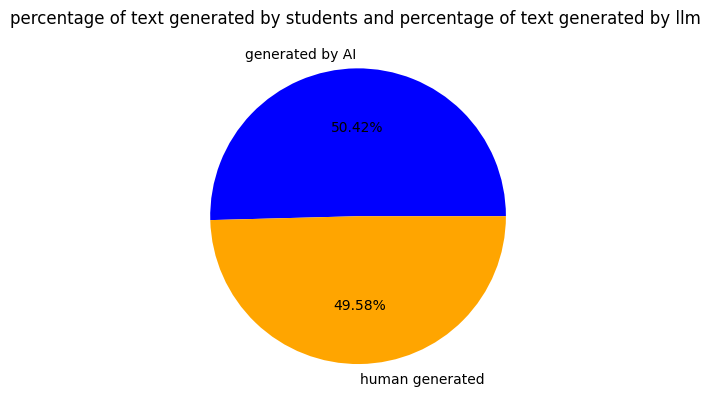

In [29]:
classes = final_data.groupby('generated').count()['text']
plt.title('percentage of text generated by students and percentage of text generated by llm ')
plt.pie(classes, labels=['generated by AI','human generated'],colors=['blue','orange'],autopct='%0.2f%%')

In [59]:
#Splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(final_data.text,final_data.generated,test_size=0.009,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10564,)
(96,)
(10564,)
(96,)


**BUILDING THE MODE**

In [60]:
#using bert model
path ="/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2"
preprocess_path = "/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/"

In [61]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(preprocess_path)
encoder_inputs  = preprocessor(text_input)

In [62]:
encoder = hub.KerasLayer(path,trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs['pooled_output']
sequence_output = outputs["sequence_output"]

In [65]:
dropout = tf.keras.layers.Dropout(0.71 , name="dropout1")(pooled_output)
dense_1 = tf.keras.layers.Dense(128 , activation='relu')(pooled_output)
dense_2 = tf.keras.layers.Dense(64 , activation='relu')(dropout)
dropout = tf.keras.layers.Dropout(0.3 , name="dropout2")(dense_2)
dense_out = tf.keras.layers.Dense(1 , activation='sigmoid', name='output')(dropout)

model = tf.keras.Model(inputs=text_input, outputs=dense_out)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer_6 (KerasLayer)  {'input_mask': (None, 128)   0         ['input_7[0][0]']             
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=["acc"])

checkpoint_filepath = 'checkpoint.hdf5'
metric = 'val_accuracy'
callback_list = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor=metric,
                    verbose=2, save_best_only=True, mode='max')
history = model.fit(x_train, y_train , batch_size=8, callbacks=[callback_list],epochs=1 , validation_data=(x_test, y_test))
# model.load_weights(checkpoint_filepath)
model.save("model-bert")

 195/1321 [===>..........................] - ETA: 1:59:36 - loss: 0.7203 - acc: 0.5673

KeyboardInterrupt: 

In [56]:
loss , acc = model.evaluate(x_train, y_train)
print("Accuracy on Train data:",acc)
loss , acc = model.evaluate(x_test, y_test)
print("Accuracy on Test data:",acc)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).